#Checkpoint 5 : Logistic regression for classification problem

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

After saving the final dataframe from "checkpoint 3" into a csv file 'titanic_cleaned', I downloaded it and I am going to load it here :

In [2]:
data=pd.read_csv('titanic_cleaned.csv')
data.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,C,Q,S,Title,FamilySize
0,0,0,2,0,28.0,13.0000,0,0,1,Mrs,1
1,1,0,3,0,25.0,7.6500,0,0,1,Mrs,1
2,2,0,3,0,20.0,7.8542,0,0,1,Mrs,1
3,3,0,3,1,29.0,21.0750,0,0,1,Mrs,5
4,4,0,1,0,31.0,52.0000,0,0,1,Mrs,2


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Title,FamilySize
0,0,2,0,28.0,13.0000,0,0,1,Mrs,1
1,0,3,0,25.0,7.6500,0,0,1,Mrs,1
2,0,3,0,20.0,7.8542,0,0,1,Mrs,1
3,0,3,1,29.0,21.0750,0,0,1,Mrs,5
4,0,1,0,31.0,52.0000,0,0,1,Mrs,2


In [5]:
df2=pd.get_dummies(data['Title'])
data=data.drop('Title',axis=1)
data=data.join(df2)
data.head()

,Survived,Pclass,Sex,Age,Fare,C,Q,S,FamilySize,Master,Miss,Mrs,Officer,Royalty
0,0,2,0,28.0,13.0000,0,0,1,1,0,0,1,0,0
1,0,3,0,25.0,7.6500,0,0,1,1,0,0,1,0,0
2,0,3,0,20.0,7.8542,0,0,1,1,0,0,1,0,0
3,0,3,1,29.0,21.0750,0,0,1,5,0,0,1,0,0
4,0,1,0,31.0,52.0000,0,0,1,2,0,0,1,0,0


##Applying Logistic Regression

From our previous analysis, we retained these importnat features :
* Sex
* FamilySize
* Age
* Master	Royalty
* Pclass

In [48]:
x=data[['Sex','FamilySize','Age','Royalty','Master','Pclass']]
y=data['Survived'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

logreg=LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Confusion Matrix

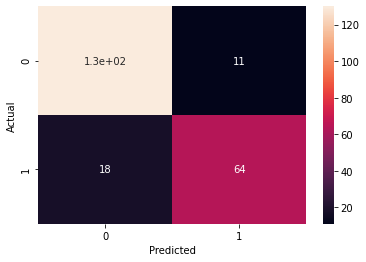

In [49]:
y_pred=logreg.predict(x_test)
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)

In [50]:
metrics.accuracy_score(y_test, y_pred)

0.8699551569506726

##AUC-ROC
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds (cutoff of the sigmoid function). This curve plots two parameters:

* True Positive Rate
* False Positive Rate

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

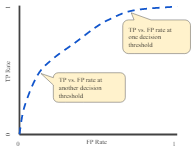

AUC : area under the curve 
AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.




In [52]:
metrics.roc_auc_score(y_true=y_test,y_score=y_pred)

0.8512368102404428

It is close to 1